# Algoritmes d’aprenentatge supervisat: Regressió


## Objectius
    Neteja i interpretació de les dades.
    Preprocessats.
    Creació de models de regressió (arbres de regressió, random forest, xarxes neuronals, altres models...).
    Utilització de les mètriques per interpretar els resultats.
    Estudi i modificació de paràmetres.

# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.




## Informació sobre el conjunt de dades

In [1]:
# Imprimir el fitxer txt
f = open('housing data description.txt', 'r')
f_content = f.read()
print (f_content)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Tancar el fitxer
f.close()

In [11]:
# Importació inicial de llibreries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Càrrega del fitxer amb les dades
df = pd.read_csv('housing data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
# Afegir nom de columnes al dataset
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Exploració de dades


Comprovació de dades nul·les

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.duplicated().sum()

0

Al no existir valors nuls ni duplicats, procedim al següent pas: realtizem un boxplot per explorar la distribució de les variables

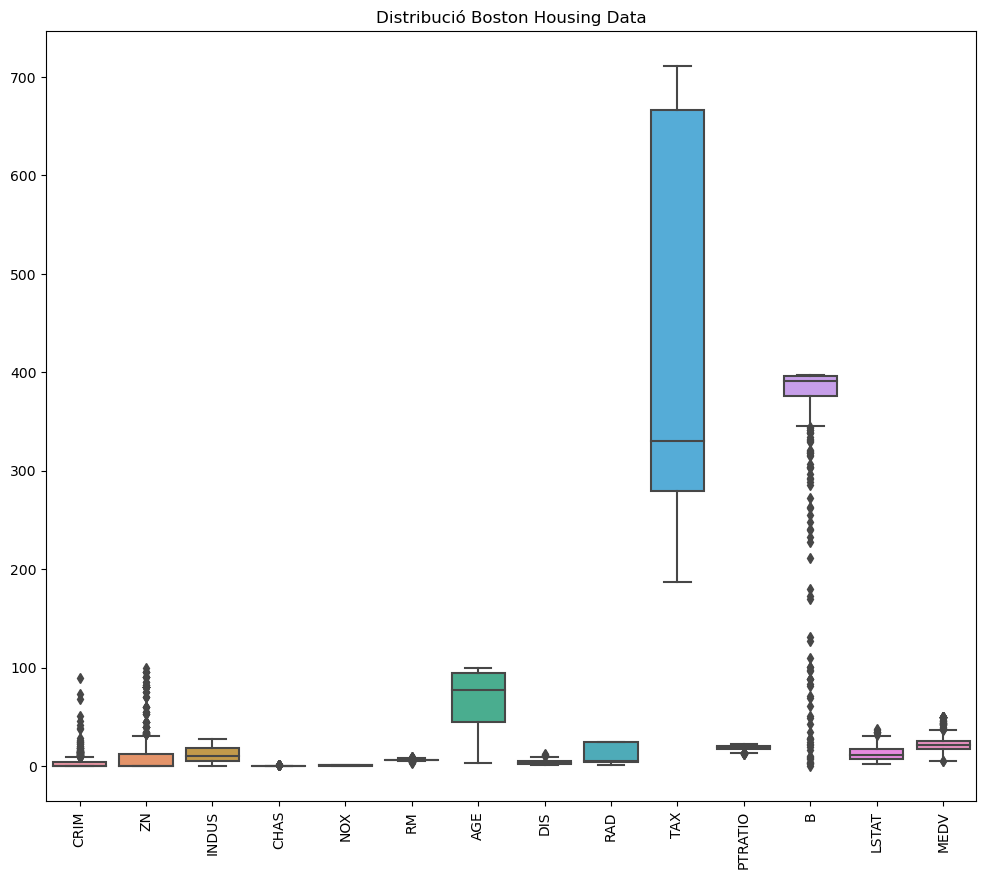

In [18]:
# Boxplot
plt.figure(figsize=(12,10))
sns.boxplot(data=df)
plt.title('Distribució Boston Housing Data')
plt.xticks(rotation=90)
plt.show()

En el boxplot podem comprovar la presència de outliers en les variables:
<ul>
    <li>CRIM</li>
    <li>ZN</li>
    <li>B</li>
    <li>LSTAT</li>
    <li>MEDV</li>
</ul>

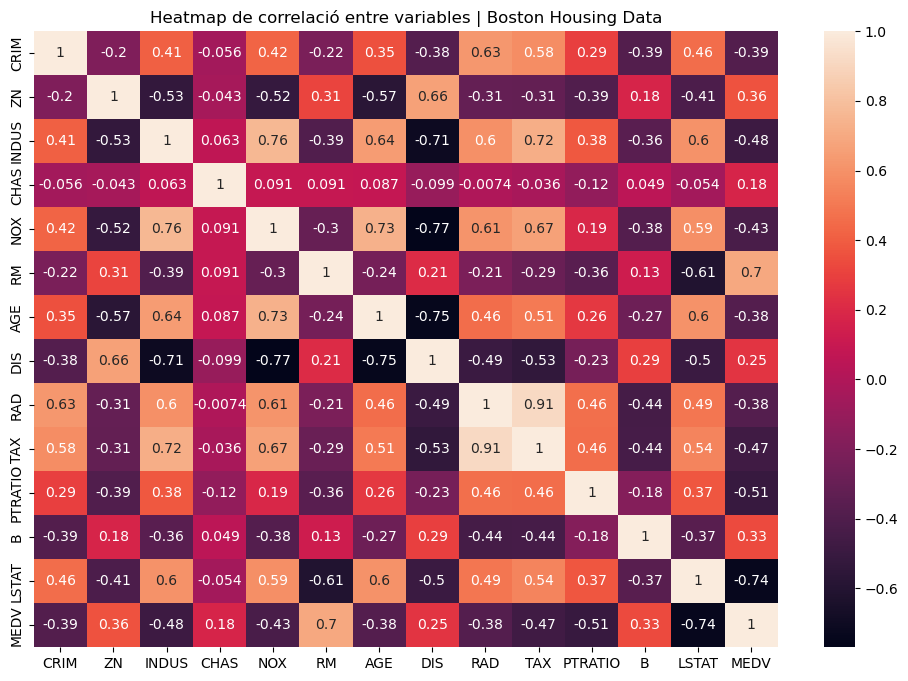

In [21]:
plt.figure(figsize=(12, 8))
matriz_corr = df.corr()
sns.heatmap(matriz_corr, annot=True)
plt.title('Heatmap de correlació entre variables | Boston Housing Data')
plt.show()

Les variables amb més <strong>correlació positiva</strong> són les següents:
<ul>
    <li>TAX i RAD: Correlació positiva forta - 0.91. Potser que l'accesibilitat a les autopistes (RAD) tingui una ttaxa d'impost sobre la propietat (variable TAX) alta</li>
    <li>NOX i INDUS: Correlació positiva moderada - 0.76, potser perquè en les àrees amb proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) hi ha més concentració d'òxids nítrics (variable NOX)</li>
    <li>NOX i AGE: Correlació positiva moderada - 0.73, potser en àrees on les vivendes són més antigües (variable AGE) existeix més concentració d'òxids nítrics (variable NOX)</li>
    <li>TAX i INDUS: Correlació positiva moderada - 0.72. Una possible explicació seria que en les àrees amb proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) tenen més taxa d'impost sobre la propietat (variable TAX)</li>

Les variables amb més <strong>correlació negativa</strong> són les següents:
<ul>
    <li>NOX i DIS: Correlació negativa moderada - 0.77. Potser que els lugars de més contaminació(NOX) són el que estan més menys distànica ponderada a cinc centres d'ocupació de Boston (DIS)</li>
    <li>AGE i DIS: Correlació negativa moderada - 0.75. Probablement les àrees on les vivendes són més antigües (variable AGE) estan a menys distànica ponderada a cinc centres d'ocupació de Boston (DIS) </li>
    <li>MDEV i LSTAT: Correlació negativa moderada - 0.74. Potser el valor mitjà de les vivendes ocupades pel propietari (MEDV) baixa quant més gran és el % de la població amb estatus més baix (LSTAT)</li>
    <li>INDUS i DIS: Correlació negativa moderada - 0.71. Suggereix que en les àrees amb més proporció de terrenys no destinats a la venda al detall per municipi (variable INDUS) estan mñes a prop dels cinc centres d'ocupació de Boston (DIS) </li>

# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.


# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.


# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)}

In [3]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
a